<center>
<h1 style="color:red;">Final Assignment of Statistics for Data Science</h1>
</center>

In [1]:
import pandas as pd
import seaborn as sns

In [28]:
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Generate Descriptive Statistics and Visualizations

<h3 style="color:blue;">For the "Median value of owner-occupied homes" provide a boxplot</h3>

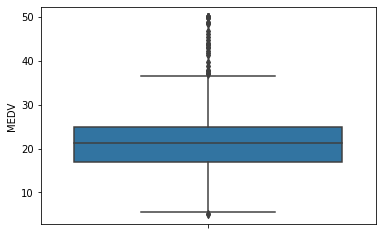

In [6]:
sns.boxplot( y = 'MEDV', data = boston_df )

<h3 style="color:blue;">Provide a  histogram for the Charles river variable</h3>

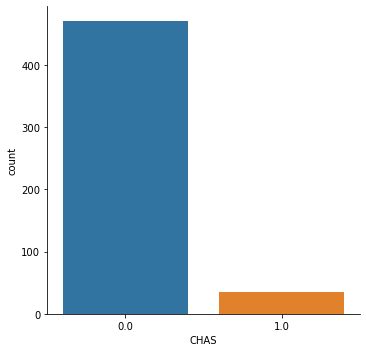

In [7]:
sns.catplot(x = 'CHAS' , kind = 'count' , data =boston_df)

<h3 style="color:blue;">Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</h3>

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35) , 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >=  70) , 'age_group'] = '70 years and older'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70) , 'age_group'] = 'between 35 and 70'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


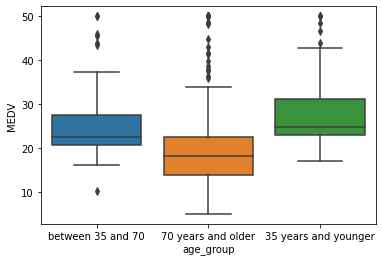

In [10]:
sns.boxplot( x = 'age_group' , y = 'MEDV' , data = boston_df )

<h3 style="color:blue;">Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</h3>

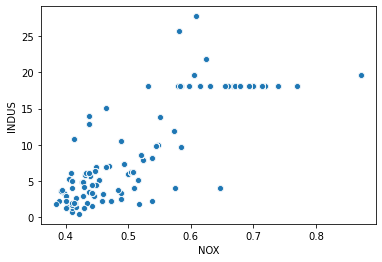

In [12]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

While Nitric oxide concentrations increases, value of proportion of non-retail business acres per town also increases. On the other Hand;  it gets constant after a certain point.

<h3 style="color:blue;">Create a histogram for the pupil to teacher ratio variable</h3>

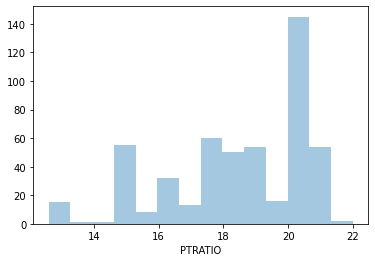

In [14]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

# Use the appropriate tests to answer the questions provided

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

###  Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Hypothesis

- **H0:** There is no difference in median value of houses bounded by the Charles river or not.

- **HA:** There is a difference in median value of houses bounded by the Charles river or not.

In [16]:
scipy.stats.levene(boston_df [ boston_df ['CHAS'] == 1.0 ]['MEDV'],
                   boston_df [ boston_df ['CHAS'] == 0.0 ]['MEDV'] , center = 'mean' )

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

since the p-value is greater than 0.05 we can **not** assume equality of variance

In [19]:
scipy.stats.ttest_ind(boston_df [ boston_df ['CHAS'] == 1.0 ]['MEDV'],
                      boston_df [ boston_df ['CHAS'] == 0.0 ]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion :** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a difference in median value of houses bounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ

In [21]:
lower_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
older_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [22]:
scipy.stats.levene(lower_35 , between_35_70 , older_70 , center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

As pvalue is greater tha 0.05, we assume equality of variance

In [23]:
f_statistic, p_value=scipy.stats.f_oneway(lower_35 , between_35_70 , older_70  )
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion : Since the p-value is less than 0.05, we will reject the null hypothesis. Hence, there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0 : there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

H1 : there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

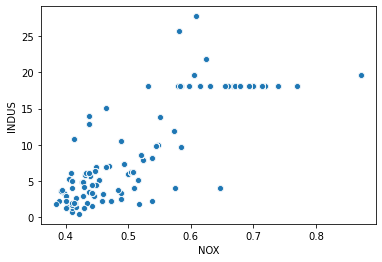

In [25]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

In [26]:
scipy.stats.pearsonr(  boston_df['NOX'] , boston_df['INDUS']  )

(0.763651446920915, 7.913361061239593e-98)

**Conclusion :** Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis. We conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**H0 :** There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

**H1 :** Additional weighted distance to the five Boston employment centres has impact on the median value of owner occupied homes

In [29]:
import statsmodels.api as sm
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        23:34:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis

Additional weighted distance to the five Boston employment centres **has impact** on the median value of owner occupied homes.
 

R-square is 0.062, R will be √0.062 (0.249). Correlation coefficient is 0.817 (close to 1), So there is a Strong correlation between additional weighted distance to the five Boston employment centres & the median value of owner occupied homes.